**Conectar ao Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importanto os Principais Pacotes**


*   Para análise de Dataframes
*   Geração de gráficos etc.



In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pylab as plt
import os

#Ignorando avisos de erro
import warnings
warnings.filterwarnings('ignore')


**Importando DataFrame do Drive**

In [ ]:
#Caminho do DataFrame no Drive
arquivo = '/content/drive/MyDrive/Colab Notebooks/Pós-qualificação Dados/+_allSNPsdata.csv'
#/content/drive/MyDrive/Doutorado_JoãoVictor/Teste_2/Editado+JP/allSNPs_mild_vs_severe.csv'
#/content/drive/MyDrive/Doutorado_JoãoVictor/Teste_2/Editado+JP/allSNPs_mild_vs_HCC.csv'
#/content/drive/MyDrive/Doutorado_JoãoVictor/Teste_2/Editado+JP/allSNPs_severe_vs_HCC.csv'
#/content/drive/MyDrive/Doutorado_JoãoVictor/Teste_2/Editado+JP/noSNPs_mild_vs_severe.csv'
#/content/drive/MyDrive/Doutorado_JoãoVictor/Teste_2/Editado+JP/noSNPs_mild_vs_HCC.csv
#/content/drive/MyDrive/Doutorado_JoãoVictor/Teste_2/Editado+JP/noSNPs_severe_vs_HCC.csv
#/content/drive/MyDrive/Doutorado_JoãoVictor/Teste_2/Editado+JP/allSNPsdata+triado.csv
#/content/drive/MyDrive/Doutorado_JoãoVictor/Teste_2/Editado+JP/noSNPs_data+triado.csv

In [ ]:
#Importando Dataframe
data = pd.read_table(arquivo, sep=';')
nome_arquivo = os.path.basename(arquivo).split(".")
nome_arquivo = nome_arquivo[0]
caminho_arquivo = os.path.dirname(arquivo)
#Verificando Diretorio
diretorio_name = caminho_arquivo+"/"+nome_arquivo
if os.path.isdir(diretorio_name):
  print("O diretório já existe!")
  print(diretorio_name)
  print("--> Verifique se ele está vazio, ou possui arquivos! \n")
else:
  os.mkdir(diretorio_name)
  print("Novo Diretório Criado! \n")
#Formato do dataframe (linhas, colunas)
print('Dados carregados! \nShape of the data is ', data.shape)

O diretório já existe!
/content/drive/MyDrive/Colab Notebooks/Pós-qualificação Dados/+_allSNPsdata
--> Verifique se ele está vazio, ou possui arquivos! 

Dados carregados! 
Shape of the data is  (90, 22)


**Avaliando os dados presentes no DataFrame**

---



In [ ]:
#Primeiras 10 linhas do Dataframe
data.head()

,ID,PTX3_rs1840680,PTX3_rs2305619,MBL_550,TNF_308,IL-28b_rs12979860,CAT_rs1001179,CD209_rs4804803,Age,Sex,...,BMI,AST,ALT,gGT,FA,Platelets,a-fetoprotein,Total_Bilirrubin,HCV,Fibrosis
0,3,1,1,0,1,1,1,1,57,1,...,24.3,144,123,273,110,122000,44.0,0.50,1,1
1,11,1,1,1,1,1,0,1,58,0,...,21.8,87,90,72,173,79000,681.0,1.00,0,2
2,14,1,1,0,1,0,0,1,48,1,...,29.0,33,44,44,236,214000,1.8,0.77,0,1
3,17,1,1,0,1,0,0,1,92,0,...,30.0,63,68,197,187,75000,237.0,0.65,0,2
4,18,1,1,1,1,1,0,1,59,0,...,34.5,25,51,23,66,237000,2.8,0.50,1,0


In [ ]:
#Tipo dos Dados encontrados em cada coluna
data.dtypes

ID                     int64
PTX3_rs1840680         int64
PTX3_rs2305619         int64
MBL_550                int64
TNF_308                int64
IL-28b_rs12979860      int64
CAT_rs1001179          int64
CD209_rs4804803        int64
Age                    int64
Sex                    int64
Blood_transfusion      int64
Injecting_drugs        int64
BMI                  float64
AST                    int64
ALT                    int64
gGT                    int64
FA                     int64
Platelets              int64
a-fetoprotein        float64
Total_Bilirrubin     float64
HCV                    int64
Fibrosis               int64
dtype: object

In [ ]:
#Convertendo OBJECT em números
#data['a-fetoprotein'] = pd.to_numeric(data['a-fetoprotein'],errors = 'coerce')
#data['BMI'] = pd.to_numeric(data['BMI'],errors = 'coerce')
data.dtypes

ID                     int64
PTX3_rs1840680         int64
PTX3_rs2305619         int64
MBL_550                int64
TNF_308                int64
IL-28b_rs12979860      int64
CAT_rs1001179          int64
CD209_rs4804803        int64
Age                    int64
Sex                    int64
Blood_transfusion      int64
Injecting_drugs        int64
BMI                  float64
AST                    int64
ALT                    int64
gGT                    int64
FA                     int64
Platelets              int64
a-fetoprotein        float64
Total_Bilirrubin     float64
HCV                    int64
Fibrosis               int64
dtype: object

In [ ]:
#Verificando de existem dados nulos
data.isnull().sum()

ID                   0
PTX3_rs1840680       0
PTX3_rs2305619       0
MBL_550              0
TNF_308              0
IL-28b_rs12979860    0
CAT_rs1001179        0
CD209_rs4804803      0
Age                  0
Sex                  0
Blood_transfusion    0
Injecting_drugs      0
BMI                  0
AST                  0
ALT                  0
gGT                  0
FA                   0
Platelets            0
a-fetoprotein        0
Total_Bilirrubin     0
HCV                  0
Fibrosis             0
dtype: int64

In [ ]:
#Eliminando linhas com dados nulos
data = data.dropna()
data.isnull().sum()

ID                   0
PTX3_rs1840680       0
PTX3_rs2305619       0
MBL_550              0
TNF_308              0
IL-28b_rs12979860    0
CAT_rs1001179        0
CD209_rs4804803      0
Age                  0
Sex                  0
Blood_transfusion    0
Injecting_drugs      0
BMI                  0
AST                  0
ALT                  0
gGT                  0
FA                   0
Platelets            0
a-fetoprotein        0
Total_Bilirrubin     0
HCV                  0
Fibrosis             0
dtype: int64

**Agrupando Dados**

Excluindo SNPs e Dados não significativos. Etapa opcional, para definir as colunas do arquivo de input.

In [ ]:
'''#Eliminando colunas dos SNPs
data.drop(["PTX3_rs1840680"], axis=1, inplace=True)
data.drop(["PTX3_rs2305619"], axis=1, inplace=True)
data.drop(["MBL_550"], axis=1, inplace=True)
data.drop(["TNF_308"], axis=1, inplace=True)
data.drop(["IL-28b_rs12979860"], axis=1, inplace=True)
data.drop(["CAT_rs1001179"], axis=1, inplace=True)
data.drop(["CD209_rs4804803"], axis=1, inplace=True)

#Eliminando Parametros não significativos
data.drop(["Age"], axis=1, inplace=True)
data.drop(["AST"], axis=1, inplace=True)
data.drop(["ALT"], axis=1, inplace=True)
data.drop(["Blood_transfusion"], axis=1, inplace=True)
data.drop(["Injecting_drugs"], axis=1, inplace=True)
data.drop(["HCV"], axis=1, inplace=True)

#Salvando Dataframe na pasta
new_file = diretorio_name+"/"+nome_arquivo+"_ValidData.csv"
data.to_csv(new_file)

#Formato do novo dataframe
data.shape'''

'#Eliminando colunas dos SNPs\ndata.drop(["PTX3_rs1840680"], axis=1, inplace=True)\ndata.drop(["PTX3_rs2305619"], axis=1, inplace=True)\ndata.drop(["MBL_550"], axis=1, inplace=True)\ndata.drop(["TNF_308"], axis=1, inplace=True)\ndata.drop(["IL-28b_rs12979860"], axis=1, inplace=True)\ndata.drop(["CAT_rs1001179"], axis=1, inplace=True)\ndata.drop(["CD209_rs4804803"], axis=1, inplace=True)\n\n#Eliminando Parametros não significativos\ndata.drop(["Age"], axis=1, inplace=True)\ndata.drop(["AST"], axis=1, inplace=True)\ndata.drop(["ALT"], axis=1, inplace=True)\ndata.drop(["Blood_transfusion"], axis=1, inplace=True)\ndata.drop(["Injecting_drugs"], axis=1, inplace=True)\ndata.drop(["HCV"], axis=1, inplace=True)\n\n#Salvando Dataframe na pasta\nnew_file = diretorio_name+"/"+nome_arquivo+"_ValidData.csv"\ndata.to_csv(new_file)\n\n#Formato do novo dataframe\ndata.shape'

In [ ]:
data.dtypes

ID                     int64
PTX3_rs1840680         int64
PTX3_rs2305619         int64
MBL_550                int64
TNF_308                int64
IL-28b_rs12979860      int64
CAT_rs1001179          int64
CD209_rs4804803        int64
Age                    int64
Sex                    int64
Blood_transfusion      int64
Injecting_drugs        int64
BMI                  float64
AST                    int64
ALT                    int64
gGT                    int64
FA                     int64
Platelets              int64
a-fetoprotein        float64
Total_Bilirrubin     float64
HCV                    int64
Fibrosis               int64
dtype: object

In [ ]:
#'Age', 'Sex', 'Blood_Transfusion', 'Injecting_drugs', 'BMI', 'AST', 'ALT', 'gGT', 'FA', 'Platelets', 'AFP'
#'Total_Bilirubin', 'HCV', 'Fibrosis'
#'PTX3_rs1840680', 'PTX3_rs2305619', 'MBL_550', 'TNF_308', 'IL-28b_rs12979860', 'CAT_rs1001179', 'CD209_rs4804803'

# numerical fearures
#num_feats = ['Age', 'BMI', 'AST', 'ALT', 'gGT', 'FA', 'Platelets', 'a-fetoprotein', 'Total_Bilirrubin' ]
num_feats = ['BMI', 'gGT', 'FA', 'Platelets', 'a-fetoprotein', 'Total_Bilirrubin' ]

# Dados categóricos binários
#bin_feats = ['Sex', 'Blood_transfusion', 'Injecting_drugs', 'HCV']
bin_feats = ['Sex']


# Dados categóricos binários incluindo SNPs
#bin_feats = ['Sex', 'Blood_transfusion', 'Injecting_drugs', 'HCV', 'PTX3_rs1840680', 'PTX3_rs2305619', 'MBL_550', 'TNF_308', 'IL-28b_rs12979860', 'CAT_rs1001179', 'CD209_rs4804803']


# Dados categóricos Múltiplos
nom_feats= ['Fibrosis']

#Dados categóricos
cat_feats = nom_feats + bin_feats

#Todos os dados
all_data = num_feats + bin_feats + nom_feats

In [ ]:
#Descição do Dataframe
data.drop(["ID"], axis=1, inplace=True)
data.describe().to_csv(diretorio_name+"/"+nome_arquivo+"_DescribedData.csv")
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PTX3_rs1840680,90.0,0.844444,0.364464,0.0,1.0000,1.000,1.0000,1.0
PTX3_rs2305619,90.0,0.800000,0.402241,0.0,1.0000,1.000,1.0000,1.0
MBL_550,90.0,0.455556,0.500811,0.0,0.0000,0.000,1.0000,1.0
TNF_308,90.0,0.766667,0.425322,0.0,1.0000,1.000,1.0000,1.0
IL-28b_rs12979860,90.0,0.222222,0.418069,0.0,0.0000,0.000,0.0000,1.0
CAT_rs1001179,90.0,0.311111,0.465542,0.0,0.0000,0.000,1.0000,1.0
CD209_rs4804803,90.0,0.533333,0.501683,0.0,0.0000,1.000,1.0000,1.0
Age,90.0,59.066667,10.859470,27.0,53.0000,59.500,66.0000,92.0
Sex,90.0,0.466667,0.501683,0.0,0.0000,0.000,1.0000,1.0
Blood_transfusion,90.0,0.466667,0.501683,0.0,0.0000,0.000,1.0000,1.0


***Target distribution***

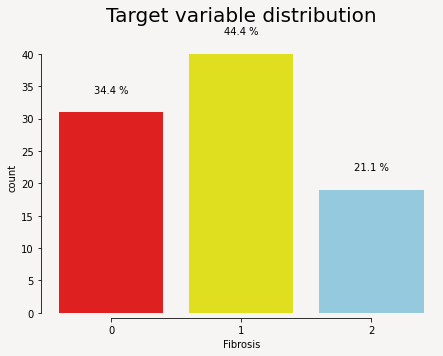

In [ ]:
#Paleta de cores
mypal= ['#FF0000', '#FF4500', '#FFFF00','#FFFFE0', '#87CEEB','#0000CD']

#Gráfico de Barras para Distribuição das Variáveis
plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(data))
ax = sns.countplot(x=data['Fibrosis'], palette=mypal[0::2])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center")

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)
plt.savefig(diretorio_name+"/"+nome_arquivo+"Distribuicao_Da_variavel_alvo.pdf")

**DISTRIBUIÇÃO DOS DADOS NUMÉRICOS**

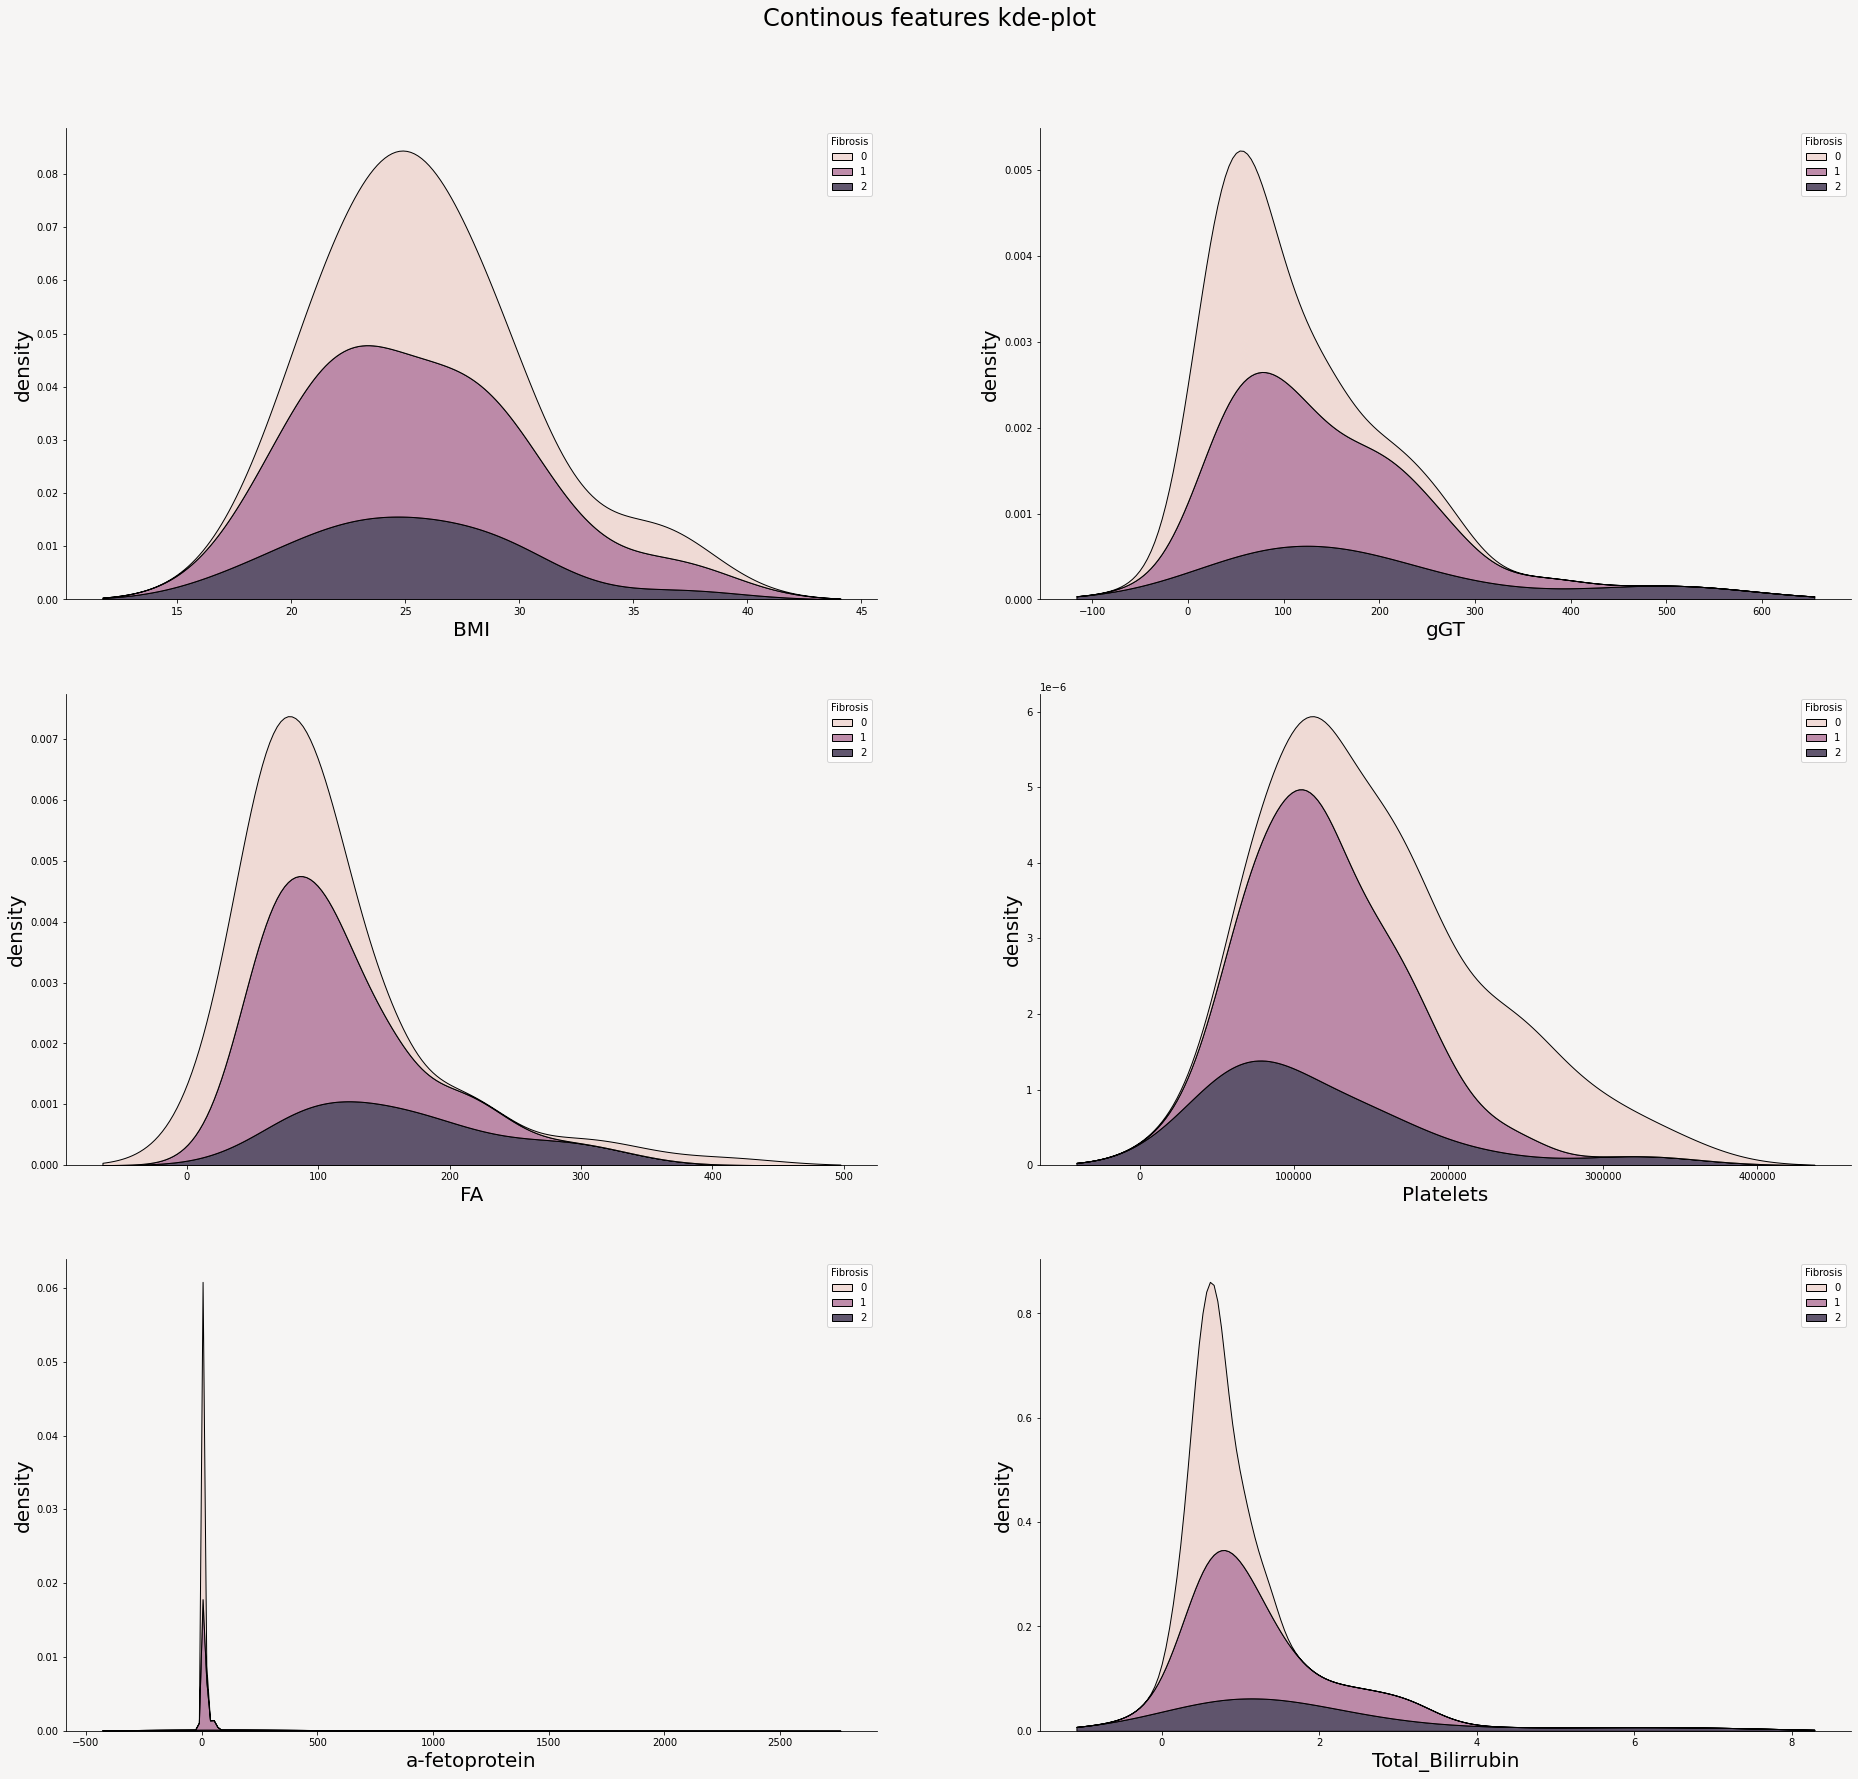

In [ ]:
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(32, 28),facecolor='#F6F5F4')   
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
    
    ax = sns.kdeplot(data=data, x=col, hue="Fibrosis", multiple="stack") 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    
    i = i +1
plt.suptitle('Continous features kde-plot' ,fontsize = 24);
plt.savefig(diretorio_name+"/"+nome_arquivo+"Distribuicao_Densidade_variaveis.pdf")

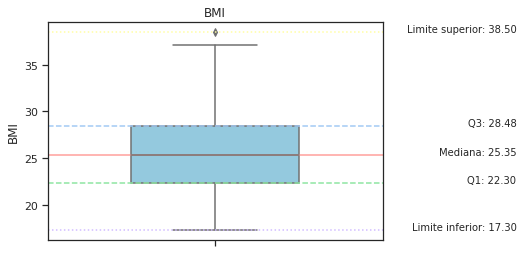

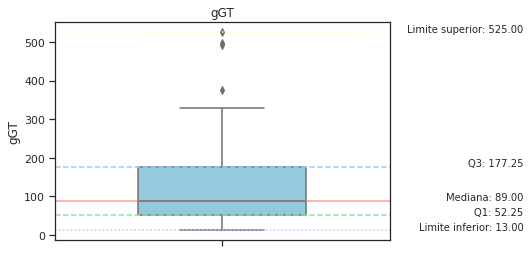

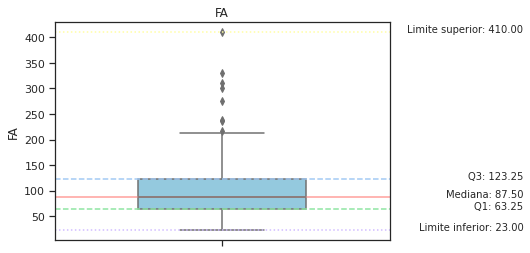

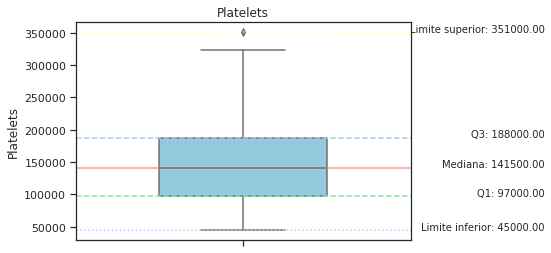

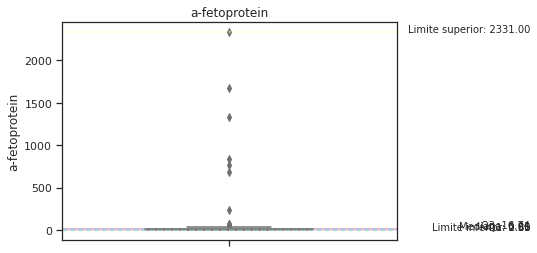

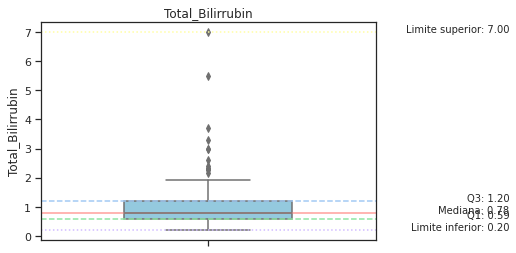

In [ ]:
#Lista de Colunas
colunas = ['BMI', 'gGT', 'FA', 'Platelets', 'a-fetoprotein', 'Total_Bilirrubin' ]

# configurar o estilo do seaborn
sns.set(style="ticks", palette="pastel")

df=data

# criar o boxplot para cada coluna
for coluna in colunas:
    # criar o boxplot com a coluna atual
    ax = sns.boxplot(y=coluna, data=df, color="skyblue", width=0.5, )
    
    # incluir valores da mediana, quartis e limites
    median = df[coluna].median()
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)
    lower = df[coluna].min()
    upper = df[coluna].max()
    ax.axhline(y=median, color='r', linestyle='-', label='Mediana')
    ax.axhline(y=q1, color='g', linestyle='--', label='Q1')
    ax.axhline(y=q3, color='b', linestyle='--', label='Q3')
    ax.axhline(y=lower, color='m', linestyle=':', label='Limite inferior')
    ax.axhline(y=upper, color='y', linestyle=':', label='Limite superior')
    
    # incluir valores da mediana, quartis e limites internamente no gráfico
    ax.text(0.9, median, f'Mediana: {median:.2f}', horizontalalignment='right', fontsize=10)
    ax.text(0.9, q1, f'Q1: {q1:.2f}', horizontalalignment='right', fontsize=10)
    ax.text(0.9, q3, f'Q3: {q3:.2f}', horizontalalignment='right', fontsize=10)
    ax.text(0.9, lower, f'Limite inferior: {lower:.2f}', horizontalalignment='right', fontsize=10)
    ax.text(0.9, upper, f'Limite superior: {upper:.2f}', horizontalalignment='right', fontsize=10)
    
    # adicionar legenda
    #ax.legend()
       
    # definir título do boxplot com o nome da coluna
    ax.set_title(coluna)
    
    fig.tight_layout()
    # mostrar o gráfico
    #plt.plot(15,15)
    plt.savefig(diretorio_name+"/"+nome_arquivo+"Box_plot_variaveis+numericas_"+coluna, format='png', bbox_inches='tight', dpi=300)
    #plt.figure(figsize=(15, 15))
    plt.show()
    


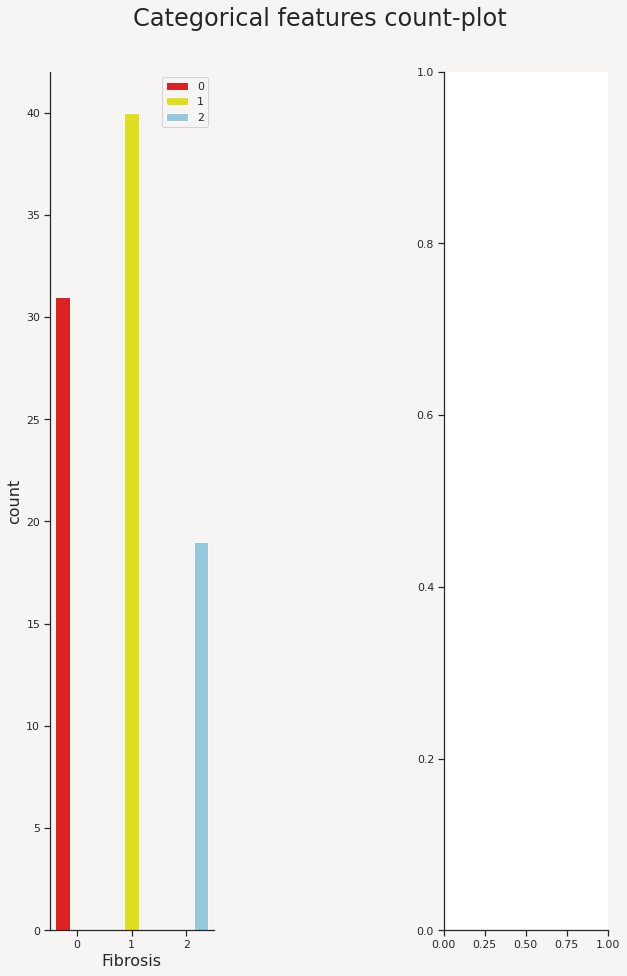

In [ ]:
#Histogramas de distribuição dos dados
def hist_plot(data, cat_feats):    
    L = len(cat_feats)
    ncol= 3
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(10, 15), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        g = sns.countplot(data=data, x=col, hue='Fibrosis', palette=mypal[0::2])
        g.set_xlabel(col, fontsize=16)
        g.set_ylabel("count", fontsize=16)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F4')
        i = i +1

    plt.suptitle('Categorical features count-plot' ,fontsize = 24)
    return 0

hist_plot(data, cat_feats[0:-1]);
plt.savefig(diretorio_name+"/"+nome_arquivo+"Distribuicao_Das_variaveis_categoricas.pdf")

In [ ]:
#Gráficos pairplot para dados numéricos
"""
nf = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density','pH', 'sulphates', 'alcohol', 'style']
data_ = data[nf]
g = sns.pairplot(data_, hue="style", corner=True, diag_kind='hist', palette=mypal[1::4]);
g.fig.set_size_inches(28,28);
plt.suptitle('Numerical features pairplot' ,fontsize = 24);
"""

'\nnf = [\'fixed_acidity\', \'volatile_acidity\', \'citric_acid\', \'residual_sugar\', \'chlorides\', \'free_sulfur_dioxide\', \'total_sulfur_dioxide\', \'density\',\'pH\', \'sulphates\', \'alcohol\', \'style\']\ndata_ = data[nf]\ng = sns.pairplot(data_, hue="style", corner=True, diag_kind=\'hist\', palette=mypal[1::4]);\ng.fig.set_size_inches(28,28);\nplt.suptitle(\'Numerical features pairplot\' ,fontsize = 24);\n'

**REGREÇÃO**

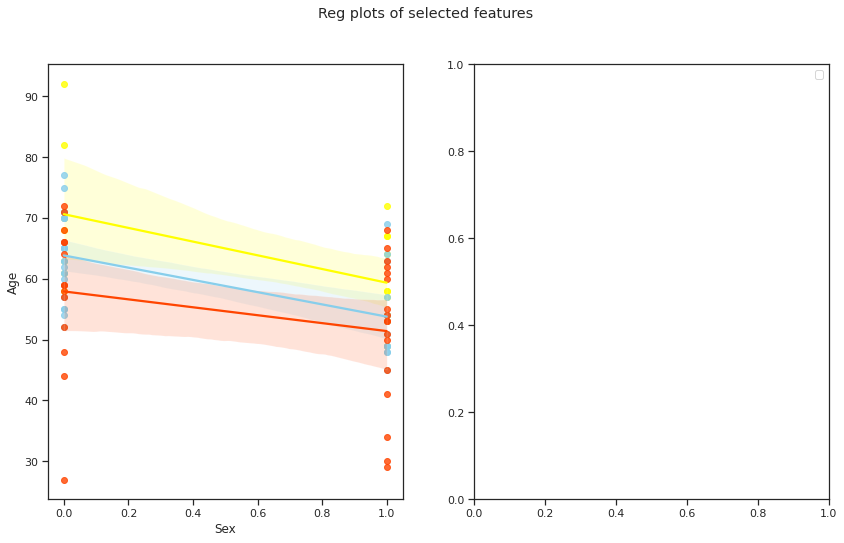

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14, 8))
sns.regplot(data=data[data['Fibrosis'] == 2], x='Sex', y='Age', ax = ax[0], color=mypal[2], label='2')
sns.regplot(data=data[data['Fibrosis'] == 1], x='Sex', y='Age', ax = ax[0], color=mypal[4], label='1')
sns.regplot(data=data[data['Fibrosis'] == 0], x='Sex', y='Age', ax = ax[0], color=mypal[1], label='0')
#sns.regplot(data=data[data['style'] ==1], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[0], label='1')
#sns.regplot(data=data[data['style'] ==0], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[5], label='0')
#sns.regplot(data=data[data['style'] ==1], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[0], label='1')
#sns.regplot(data=data[data['style'] ==0], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[5], label='0')
#sns.regplot(data=data[data['style'] ==1], x='age', y='st_depression', ax = ax[3], color=mypal[0], label='1')
#sns.regplot(data=data[data['style'] ==0], x='age', y='st_depression', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();
plt.savefig(diretorio_name+"/"+nome_arquivo+"Regressao.pdf")

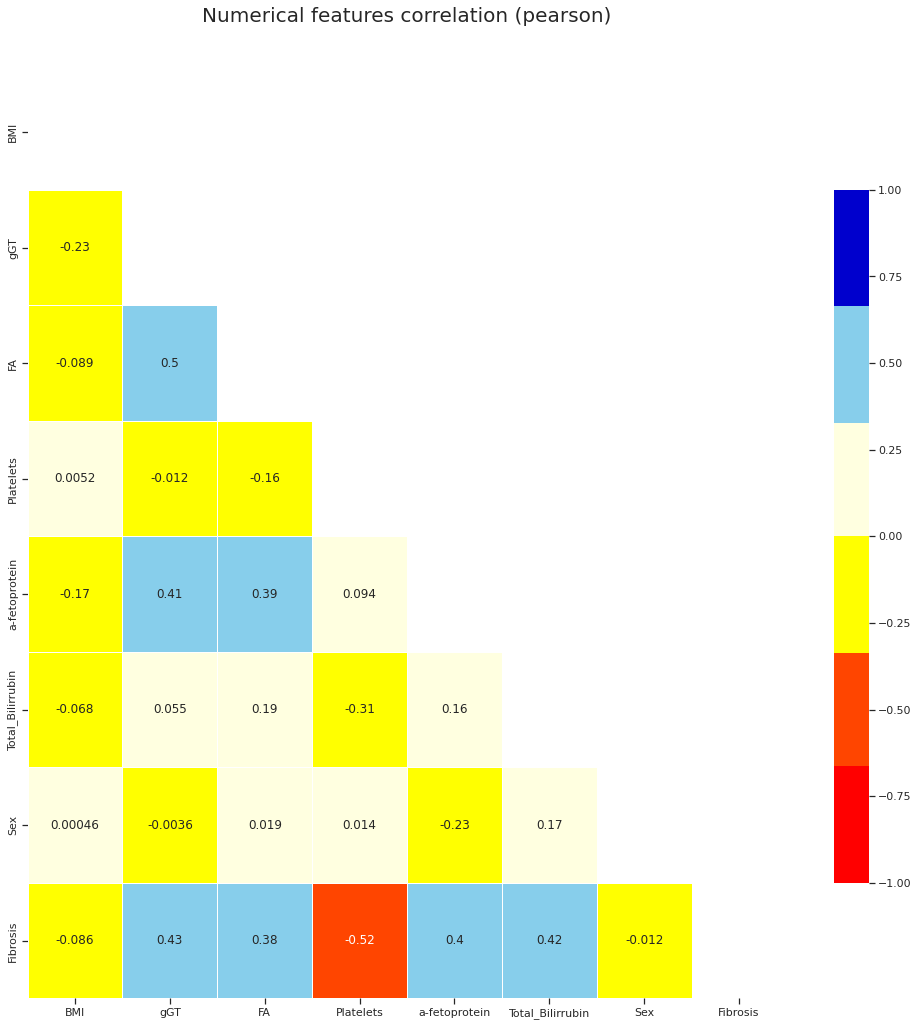

In [ ]:
#CORRELAÇÃO
metodo_correlacao = "pearson"
df_ = data[all_data]
corr = df_.corr(method= metodo_correlacao) #method : {'pearson', 'kendall', 'spearman'}
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(17, 17), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation ("+metodo_correlacao+")", fontsize=20, y= 1.05);
plt.savefig(diretorio_name+"/"+nome_arquivo+"Correlaçao_"+metodo_correlacao+".pdf")



**Point biserial correlation**

- A point-biserial correlation is used to measure the strength and direction of the association that exists between **one continuous variable and one dichotomous variable**. 

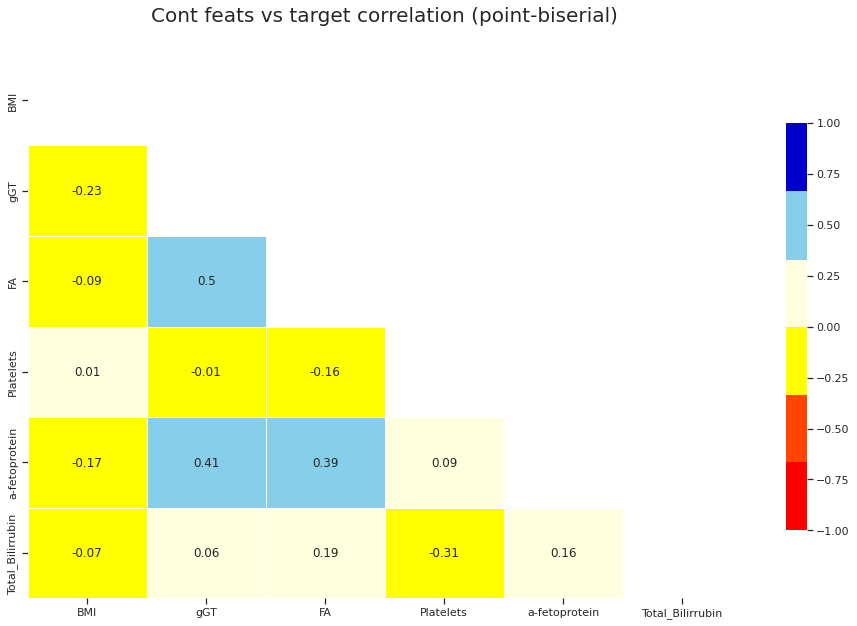

In [ ]:
feats_ = ['BMI', 'gGT', 'FA', 'Platelets', 'a-fetoprotein', 'Total_Bilirrubin']

def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]

rows= []
for x in feats_:
    col = []
    for y in feats_ :
        pbs =point_biserial(data[x], data[y]) 
        col.append(round(pbs,2))  
    rows.append(col)  
    
pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns = data[feats_].columns, index =data[feats_].columns)

mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(16, 10), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Cont feats vs target correlation (point-biserial)", fontsize=20, y= 1.05);
plt.savefig(diretorio_name+"/"+nome_arquivo+"Point_bisserial_correlation.pdf")

**Cramer's V correlation**

* In statistics, Cramér's V is a measure of association between **two nominal variables**, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic and was published by Harald Cramér in 1946. [[ref. ](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)]

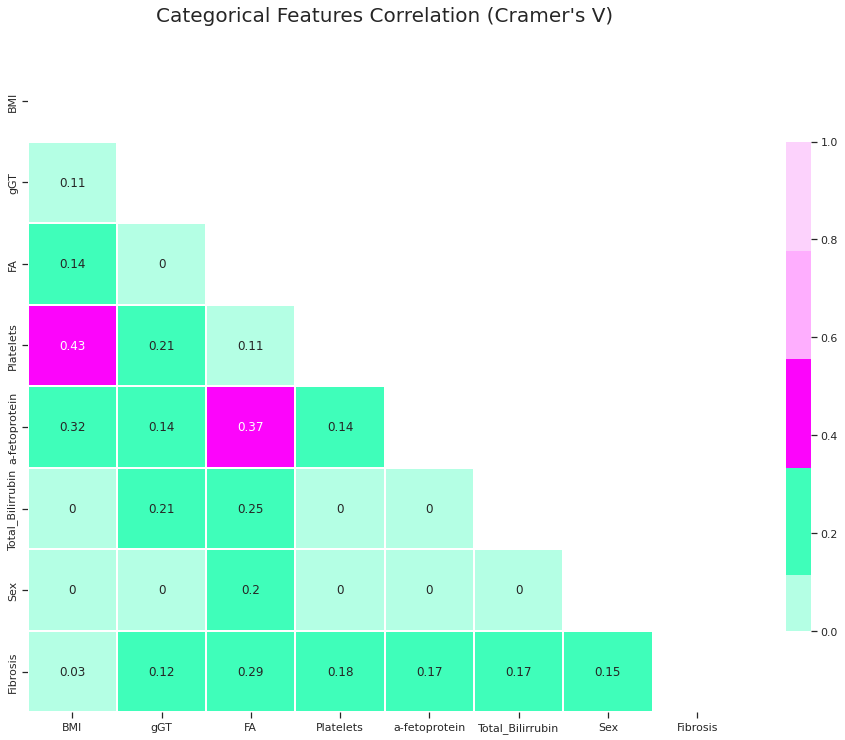

In [ ]:
# the cramers_v function is copied from
#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# Calculando a Correlação
data_ = data[all_data]
rows= []
for x in data_:
    col = []
    for y in data_ :
        cramers =cramers_v(data_[x], data_[y]) 
        col.append(round(cramers,2))
    rows.append(col)
    
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_.columns, index = data_.columns)

# Paleta de Cor
mypal_1= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA', '#FC05FB', '#FEAEFE', '#FCD2FC']

# Configurações da Figura
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(16, 12), facecolor=None)
cmap = sns.color_palette(mypal_1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Categorical Features Correlation (Cramer's V)", fontsize=20, y= 1.05);
plt.savefig(diretorio_name+"/"+nome_arquivo+"Cramers_V.pdf")

**Scikit Learn Classifiers**

 Scikit learn offers a wide range of classification algorithms and is often the starting point in most/traditional machine learning challenges, so we start by exploring few of the classification alorithms from the sklearn libarary such as `Logistic Regression`, `Nearest Neighbors`, `Support Vectors`, `Nu SVC`, `Decision Tree`, `Random Forest`, `AdaBoost`, `Gradient Boosting`, `Naive Bayes`, `Linear Discriminant Analysis`, `Quadratic Discriminant Analysis` and `Neural Net`.

In [ ]:
# Instalando o pacote Shap que não consta no Google Colab
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 28.6 MB/s eta 0:00:00


In [ ]:
'''
label_encoder = LabelEncoder()
data_encoded = data.copy()
    
for col in cat_feats:
  data_encoded[col] = label_encoder.fit_transform(data[col])
    
  data = data_encoded

data.head()
'''


'\nlabel_encoder = LabelEncoder()\ndata_encoded = data.copy()\n    \nfor col in cat_feats:\n  data_encoded[col] = label_encoder.fit_transform(data[col])\n    \n  data = data_encoded\n\ndata.head()\n'

In [ ]:
#Separando as Variáveis

#Apenas Coluna de Fibrose
y = data['Fibrosis']

#Todos menos a coluna de Fibrose
x = data.drop('Fibrosis', axis = 1)

In [ ]:
#Separando os dados em Treino e Teste

#Importando o Pacote
from sklearn.model_selection import train_test_split

#criando os conjuntos de dados treino e teste
seed=0
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.30, random_state=seed)

In [ ]:
#Importando os pacotes de ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
import shap


#Lista dos pacotes de ML que iremos rodar
classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

#Nome dos algorítimos de ML que utilizaremos
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

#criação do modelo
for item, nome in zip(classifiers, names):
  item.fit(x_treino, y_treino)

  #Imprimindo Resultados
  resultado = item.score(x_teste, y_teste)
  print(nome + ": Acurácia do modelo - ", resultado*100, " %")
  with open(diretorio_name+"/"+nome_arquivo+"_Resultado_ML.txt", 'a') as f:
    print(nome + ": Acurácia do modelo - ", resultado*100, " %", file = f)

ImportError: ignored

In [ ]:
!pip install yellowbrick

In [ ]:
#PACOTES PARA RODAR O ROC PARA VARIÁVEIS MÚLTIPLAS
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

#criação do modelo
for item, nome in zip(classifiers, names):
  item.fit(x_treino, y_treino)

  #Imprimindo Resultados
  try:
    visualizer = ROCAUC(item, classes=["0", "1", "2"])

    visualizer.fit(x_treino, y_treino)  # Fit the training data to the visualizer
    visualizer.score(x_teste, y_teste)  # Evaluate the model on the test data
    visualizer.show(outpath= diretorio_name+"/"+nome_arquivo+"_ROC_curves_"+nome+".png", clear_figure=True)
    
  except:
    print("\n\n ERRO no método: ", nome)
    print("\n\n")                     

**ROC curves** : A receiver operating characteristic (ROC) curve, is a graphical plot which illustrates the performance of a binary classification algorithm as a function of ture positive rate and false positive rate. 

In [ ]:
#SUMÁRIO DOS SCORES
cols=["Classifier", "Accuracy", "Recall", "Precision", "F1"]
#cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
data_table = pd.DataFrame(columns=cols)
    
for name, clf in zip(names, classifiers):
  clf.fit(x_treino, y_treino)
        
  pred = clf.predict(x_teste)
  accuracy = accuracy_score(y_teste, pred)

  pred_proba = clf.predict_proba(x_teste)[:, 1]
        
  #fpr, tpr, thresholds = roc_curve(y_teste, pred_proba)        
  #roc_auc = auc(fpr, tpr)
        
  # confusion matric, cm
  cm = confusion_matrix(y_teste, pred) 
        
  # recall: TP/(TP+FN)
  recall = cm[1,1]/(cm[1,1] +cm[1,0])
        
  # precision: TP/(TP+FP)
  precision = cm[1,1]/(cm[1,1] +cm[0,1])
        
  # F1 score: TP/(TP+FP)
  f1 = 2*recall*precision/(recall + precision)

  #df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
  df = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)
  data_table = data_table.append(df)     

score_data = np.round(data_table.reset_index(drop=True), 2)

In [ ]:
#Formatando DADOS como heatmap
score_data.sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')\
.to_excel(diretorio_name+"/"+nome_arquivo+"_RESULTADOS_ML.xlsx", engine='openpyxl')

**Accuracy** : Measures how many of the cases are correctly identified/predicted by the model, i.e correct prediction divided by the total sample size.

$\frac{TP + TN}{TP +TN + FP + FN}$

**Recall**: Measures the rate of *true positives*, i.e how many of the *actual* positive cases are *identified/predicted* as positive by the model.

$\frac{TP}{(TP + FN)}$

**Precision**: Measures how many of the positive predicted cases are actually positive.

$\frac{TP}{(TP + FP)}$



In [ ]:
#MATRIZES DE CONFUSÃO
def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    '''
    Plots confusion matrices in a subplots.
    
    Args:
        names : list of names of the classifier
        classifiers : list of classification algorithms
        nrows, ncols : number of rows and rows in the subplots
        fig_a, fig_b : dimensions of the figure size
    '''
       
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))
    
    i = 0
    for clf, ax in zip(classifiers, axes.flatten()):
        
        clf.fit(x_treino, y_treino)
        plot_confusion_matrix(clf, x_teste, y_teste, ax=ax)
        ax.title.set_text(names[i])
        i = i + 1       
        
    plt.tight_layout() 
#    plt.show()
    plt.savefig(diretorio_name+"/"+nome_arquivo+"Matrizes_de_Confusao.pdf")

In [ ]:
plot_conf_matrix(names, classifiers, nrows=4, ncols=3, fig_a=13, fig_b=13)


**Confusion matrix** : A confusion matrix (aka an error matrix) is a specific table layout that allows visualization of the performance of a supervised learning algorithm. Each row of the matrix represents the instances in an *actual* class while each column represents the instances in a *predicted* class [[wiki](https://en.wikipedia.org/wiki/Confusion_matrix)]. The table below is an example of a confusion matrix for a binary classification from which other terminologies/metric can be derived. Some of the metrics are described below.


**Parameter Tuning (RandomizedSearch)**

So chosen our best classifier, the Logistic regression model. However, this was achieved with default parameters. The intuition is that we could further improve our model with tuned parameters. Let's see if could achieve that using the scikit-learn RandomizedSearch algorithm.  

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RepeatedStratifiedKFold


lr = LogisticRegression(tol=1e-4, max_iter=1000, random_state=seed)

space = dict(C=uniform(loc=0, scale=5),
                     penalty=['l2', 'l1'],
                     solver= ['liblinear'])

search = RandomizedSearchCV(lr, 
                         space, 
                         random_state=seed,
                         cv = 5, 
                         scoring='f1')

rand_search = search.fit(x_treino, y_treino)

print('Best Hyperparameters: %s' % rand_search.best_params_)

In [ ]:
params = rand_search.best_params_
lr = LogisticRegression(**params)
lr.fit(x_treino, y_treino)
print(classification_report(y_teste, lr.predict(x_teste)))
with open(diretorio_name+"/"+nome_arquivo+"_Resultado_RegressaoLogistica_melhorado.txt", 'a') as f:
  print((classification_report(y_teste, lr.predict(x_teste))), file = f)

In [ ]:
plot_confusion_matrix(lr, x_teste, y_teste)

**Remark** : It turns out that our base model (default params) is not bad at all. Parameter tuning did not help to further increase the performance.

**Catboost, Lgbm and xgboost**

In [ ]:
#INSTALANDO PACOTES
!pip install CatBoost
!pip install xgboost
!pip install lightgbm

In [ ]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

names_boost =[
    'Catboost',
    'xgbbost',
    'light GBM'
]
classifiers_especial = [
    CatBoostClassifier(random_state=seed, verbose=0),
    XGBClassifier(objective= 'binary:logistic', random_state=seed),
    LGBMClassifier(random_state=seed)
   ]

#criação do modelo
for item, nome in zip(classifiers_especial, names_boost):
  item.fit(x_treino, y_treino)

  #Imprimindo Resultados
  resultado = item.score(x_teste, y_teste)
  print(nome + ": Acurácia do modelo - ", resultado*100, " %")
  with open(diretorio_name+"/"+nome_arquivo+"_Resultado_ML_modelos adicionais.txt", 'a') as f:
    print(nome + ": Acurácia dos modelos adicionais - ", resultado*100, " %", file = f)

In [ ]:
#SUMÁRIO DOS SCORES
cols=["Classifier", "Accuracy", "Recall", "Precision", "F1"]
#cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
data_table = pd.DataFrame(columns=cols)
    
for name, clf in zip(names_boost, classifiers_especial):
  clf.fit(x_treino, y_treino)
        
  pred = clf.predict(x_teste)
  accuracy = accuracy_score(y_teste, pred)

  pred_proba = clf.predict_proba(x_teste)[:, 1]
        
  #fpr, tpr, thresholds = roc_curve(y_teste, pred_proba)        
  #roc_auc = auc(fpr, tpr)
        
  # confusion matric, cm
  cm = confusion_matrix(y_teste, pred) 
        
  # recall: TP/(TP+FN)
  recall = cm[1,1]/(cm[1,1] +cm[1,0])
        
  # precision: TP/(TP+FP)
  precision = cm[1,1]/(cm[1,1] +cm[0,1])
        
  # F1 score: TP/(TP+FP)
  f1 = 2*recall*precision/(recall + precision)

  #df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
  df = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)
  data_table = data_table.append(df)     

score_data = np.round(data_table.reset_index(drop=True), 2)

**Performance metrics summary table**

In [ ]:
score_data.sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')\
.to_excel(diretorio_name+"/"+nome_arquivo+"_RESULTADOS_ML_adicionais.xlsx", engine='openpyxl')

**Confusion matrix**

In [ ]:
plot_conf_matrix(names=names_boost, classifiers=classifiers_especial, nrows=1, ncols=3, fig_a=12, fig_b=3);

**Parameter Tuning (RandomizedSearch)**

In [ ]:
rs_params = {
    'num_leaves': (500, 2000),
    'max_depth': (5, 15),
    'min_data_in_leaf': (80, 120),
    'bagging_fraction': (0.5, 0.8),
    'bagging_frequency': (5, 8),
    'feature_fraction': (0.5, 0.8),    
}
rs_cv = RandomizedSearchCV(estimator=XGBClassifier(objective= 'binary:logistic', random_state=seed), 
                           param_distributions=rs_params, 
                           cv = 5 , 
                           n_iter=100, 
                           verbose=1)

rs_cv.fit(x_treino, y_treino,verbose=1)

In [ ]:
print('Best Hyperparameters: %s' % rs_cv.best_params_)

print('')

params = rs_cv.best_params_

metodo = XGBClassifier(**params);

metodo.fit(x_treino, y_treino);

print(classification_report(y_teste, metodo.predict(x_teste)))
with open(diretorio_name+"/"+nome_arquivo+"_Resultado_RegressaoLogistica_adicional_melhorado.txt", 'a') as f:
  print((classification_report(y_teste, lr.predict(x_teste))), file = f)


In [ ]:
plot_confusion_matrix(metodo, x_teste, y_teste)

### Model Explainablity

**Permutation importance** and **SHAP** are two methods one can use to understand which features were selected to have the most impact on our model's prediction.

In [ ]:
!pip install eli5

**Permutation importance**

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm_imp = PermutationImportance(metodo, random_state=seed).fit(x_treino, y_treino)
w = eli5.show_weights(perm_imp, feature_names = x_teste.columns.tolist())

result = pd.read_html(w.data)[0]

arquivo_gerado = diretorio_name+"/"+nome_arquivo+"_Importancia_Variaveis.csv"
result.to_csv(arquivo_gerado)

result

**SHAP**, a short name for **SH**apely **A**dditive Ex**P**lanations, is method used to explain the output of a machine learning model. 

In [ ]:
'''
import shap
shap.initjs()
explainer = shap.TreeExplainer(metodo)
shap_values = explainer.shap_values(x_teste)
shap.summary_plot(shap_values, x_teste, feature_names=bin_feats, plot_type="bar")
'''